<a href="https://colab.research.google.com/github/iamfady/NLP/blob/main/BOW_with_NGRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
v = CountVectorizer()

v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [3]:
v = CountVectorizer(ngram_range=(1,1))

v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [5]:
v = CountVectorizer(ngram_range=(1,3))

v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [6]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [7]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [8]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [9]:
corpus_processed = [
    preprocess(text) for text in corpus
]

corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [10]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(corpus_processed)
v.vocabulary_


{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [11]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [12]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

# GET DATA

In [30]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
data_path = kagglehub.dataset_download('rmisra/news-category-dataset')

print('Data source import complete.')
print(data_path)

Data source import complete.
/kaggle/input/news-category-dataset


In [37]:
import pandas as pd
df = pd.read_json("/root/.cache/kagglehub/datasets/rmisra/news-category-dataset/versions/3/News_Category_Dataset_v3.json", lines=True)[['headline', 'category']]

print(df.shape)

(209527, 2)


In [39]:
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [38]:
df.category.value_counts()

,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


In [40]:
# Select only rows where the category is in a list of desired values

desired_categories = ['CRIME', 'COMEDY', 'EDUCATION', 'SPORTS']
df_new = df[df['category'].isin(desired_categories)]

In [42]:
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [43]:
df_new.head()

,headline,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
17,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS
26,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS
61,Boston Marathon To Make Race More Inclusive Fo...,SPORTS
62,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS


In [44]:
print(df_new.headline.shape)
print(df_new.category.shape)

(15053,)
(15053,)


In [45]:
df_new.category.value_counts()

,count
category,
COMEDY,5400
SPORTS,5077
CRIME,3562
EDUCATION,1014


In [46]:
min_samples = 1014 # we have these many EDUCATION articles

In [47]:
df_business = df_new[df_new.category=="COMEDY"].sample(min_samples, random_state=2022)
df_sports = df_new[df_new.category=="SPORTS"].sample(min_samples, random_state=2022)

df_crime = df_new[df_new.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df_new[df_new.category=="EDUCATION"].sample(min_samples, random_state=2022)

In [48]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

,count
category,
COMEDY,1014
SPORTS,1014
CRIME,1014
EDUCATION,1014


In [49]:
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'COMEDY': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'EDUCATION': 3
})

In [50]:
df_balanced.tail()

,headline,category,category_num
111169,The Global Search for Education: Our Global To...,EDUCATION,3
106643,Reflections of an Octogenarian IV: Whatever Ha...,EDUCATION,3
32087,"For The Future Of Education, Answer The Callin...",EDUCATION,3
37277,America's Charter Schools Have A Commitment Pr...,EDUCATION,3
125885,3 Tips for Using Video Interviews to Hire Grea...,EDUCATION,3


# Build a model with original text (no pre processing)


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [52]:
print(X_train.shape)
X_train.head()

(3244,)


,headline
1506,Prosecution Rests In Sex-abuse Trial Of Ghisla...
92574,Jury Moves Closer To Death Penalty In James Ho...
47816,"In A Crappy Year, These Sports Moments Brought..."
92386,Shots Reported For 2nd Day At Mississippi Mili...
113680,Stop Lying to Yourself!


In [53]:
y_train.value_counts()

,count
category_num,
2,811
1,811
3,811
0,811


In [54]:
y_test.value_counts()

,count
category_num,
1,203
3,203
2,203
0,203


### Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [56]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))), #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       203
           1       0.82      0.79      0.80       203
           2       0.87      0.91      0.89       203
           3       0.84      0.89      0.86       203

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812



In [57]:
X_test[:8]
#target = {'COMEDY': 0, 'SPORTS': 1, 'CRIME': 2, 'EDUCATION': 3}

,headline
65762,11 Law Professors Say Tom Brady Is Right And T...
19832,Florida's Teacher Gap Is No Mystery
85480,Richard Sherman Explains A Weekly Contradictio...
20592,Teacher Seniority: The Seat Belts Of The Educa...
95561,"What to Watch for in the FIFA Case, Part 5: Va..."
80283,Shoplifter Shot And Killed After Running Over ...
94008,F1 Driver Jules Bianchi Dies 9 Months After Su...
93093,Jen Welter To Become First Female Coach In NFL...


In [58]:
y_pred[:8]

array([1, 3, 1, 3, 3, 2, 2, 1])

### Attempt 2 : Use 1-gram and bigrams


In [59]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83       203
           1       0.83      0.77      0.80       203
           2       0.87      0.92      0.89       203
           3       0.84      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



### Attempt 3 : Use 1-gram to trigrams


In [60]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       203
           1       0.83      0.77      0.80       203
           2       0.86      0.92      0.89       203
           3       0.85      0.87      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [61]:
df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess)

In [62]:
df_balanced.head()

,headline,category,category_num,preprocessed_txt
15312,"Trevor Noah Calls Out Hillary Clinton, And He'...",COMEDY,0,trevor Noah call Hillary Clinton joke
126777,What Sorcery Is This?,COMEDY,0,sorcery
47238,"Hi, Death? I'd Like To Speak To Your Manager, ...",COMEDY,0,hi Death like speak manager
119663,...New Again?,COMEDY,0,New
30724,"There Was No Audio, So We Captioned The Trump ...",COMEDY,0,Audio caption Trump Putin Meeting


### Build a model with pre processed text


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2023,
    stratify=df_balanced.category_num
)

In [64]:
print(X_train.shape)

(3244,)


In [65]:
X_train.head()

,preprocessed_txt
1506,prosecution rest Sex abuse Trial Ghislaine Max...
92574,jury move close Death Penalty James Holmes Trial
47816,Crappy Year Sports Moments bring Joy
92386,shot report 2nd day Mississippi Military Site
113680,stop lie


In [66]:
y_train.value_counts()

,count
category_num,
2,811
1,811
3,811
0,811


In [67]:
y_test.value_counts()

,count
category_num,
1,203
3,203
2,203
0,203


In [68]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       203
           1       0.83      0.81      0.82       203
           2       0.84      0.91      0.88       203
           3       0.86      0.85      0.86       203

    accuracy                           0.84       812
   macro avg       0.84      0.84      0.84       812
weighted avg       0.84      0.84      0.84       812



### Plot confusion matrix


In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[159,  18,  12,  14],
       [ 15, 164,  16,   8],
       [  7,   6, 185,   5],
       [ 14,  10,   6, 173]])

Text(95.72222222222221, 0.5, 'Truth')

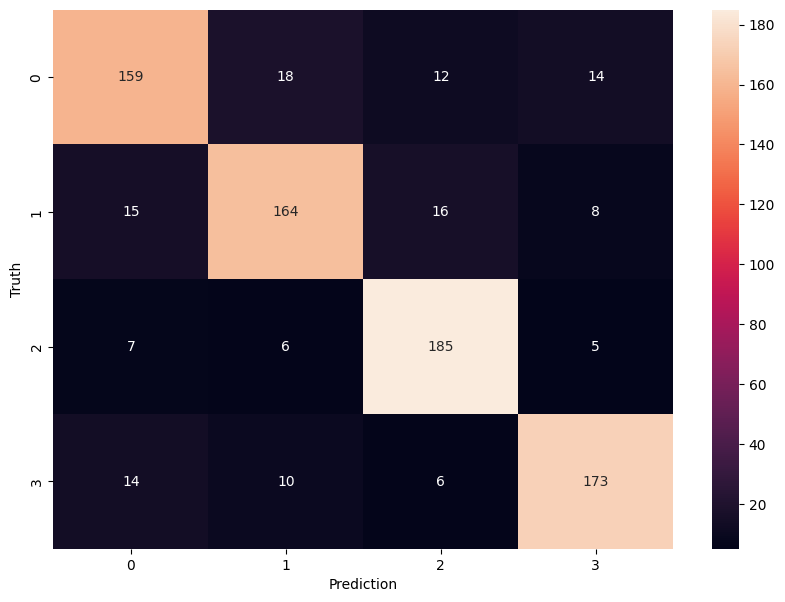

In [70]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')